Meisi Wenzel

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1P4s3p1svP3zMxp0PRK_Ax7-a6Djh-cpkzY9wunKh5M4/edit#slide=id.p"

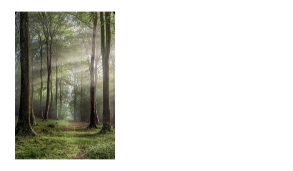

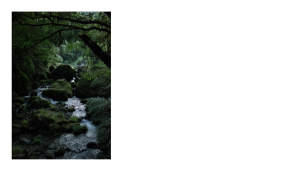

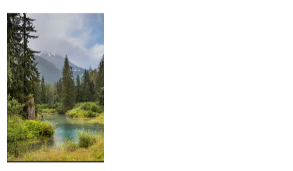

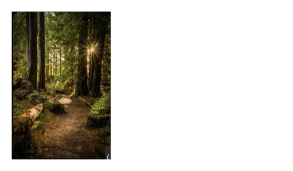

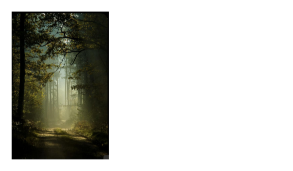

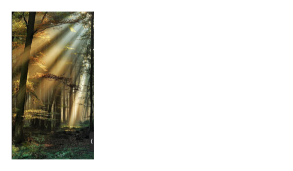

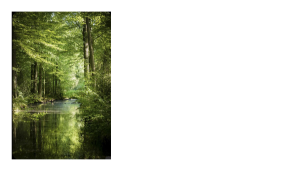

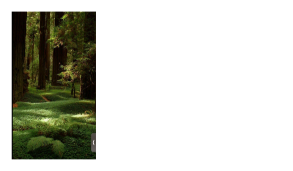

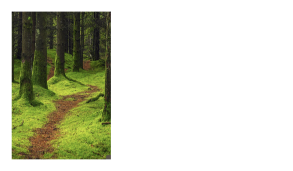

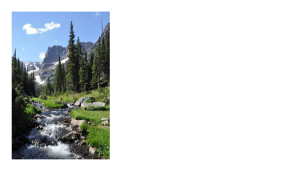

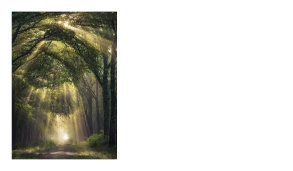

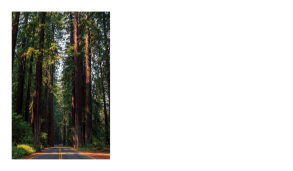

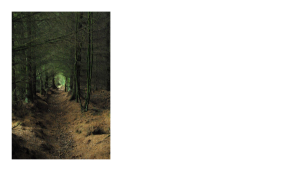

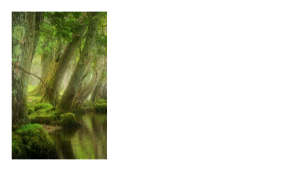

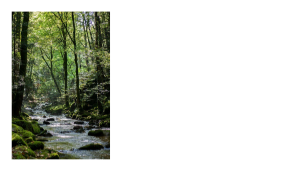

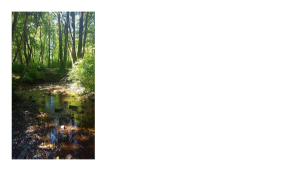

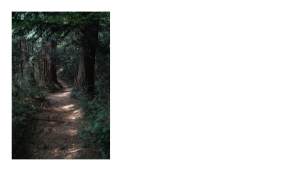

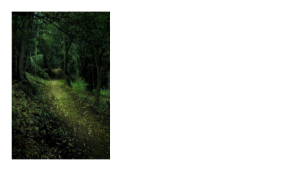

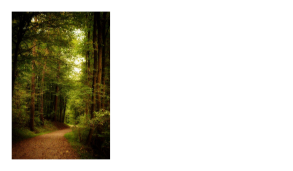

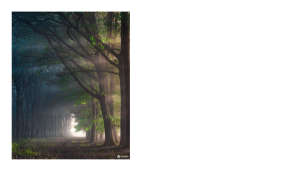

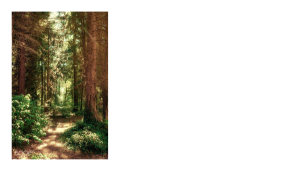

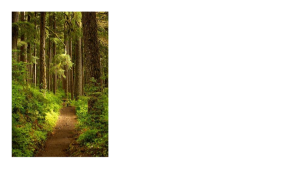

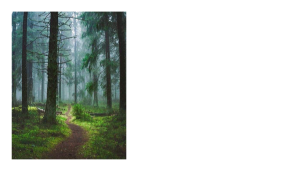

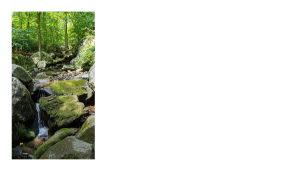

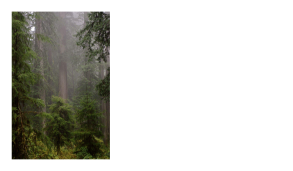

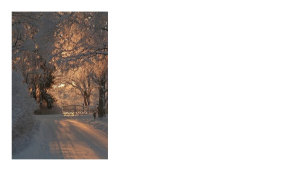

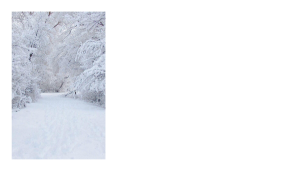

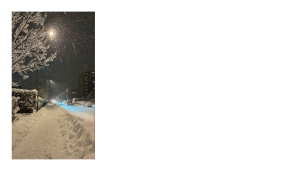

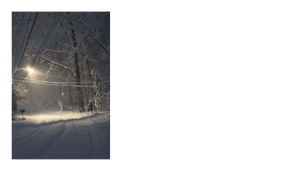

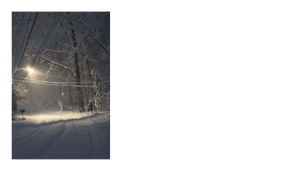

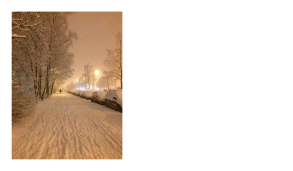

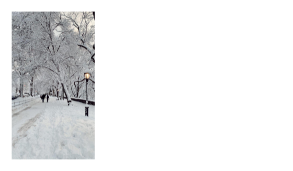

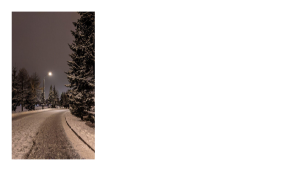

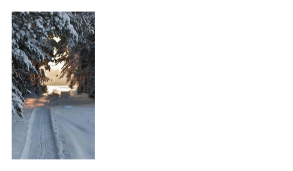

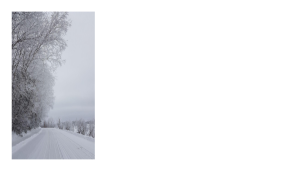

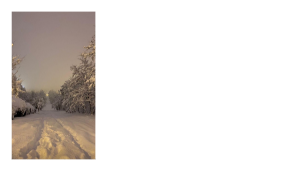

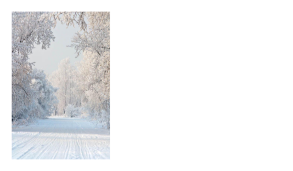

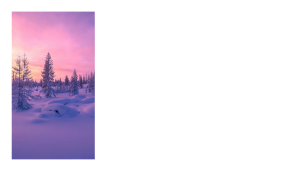

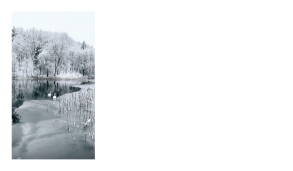

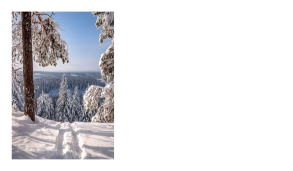

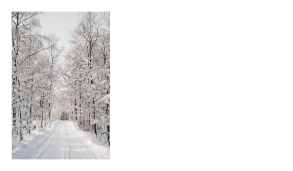

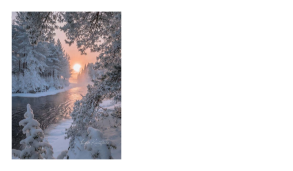

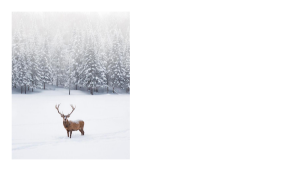

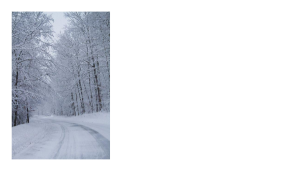

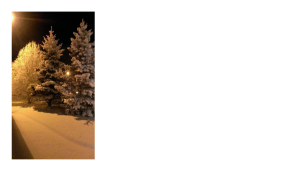

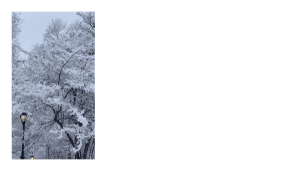

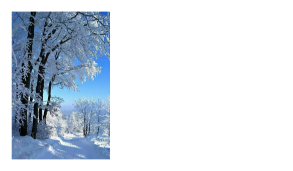

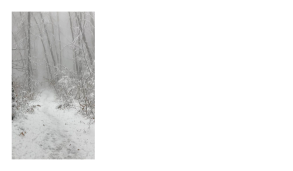

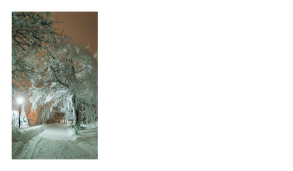

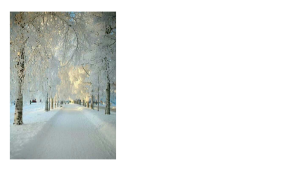

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[ 1.9566, -2.0309, -2.5174,  ..., -2.3346,  0.5265,  1.9762],
        [ 0.7513, -2.5255, -1.9387,  ..., -1.6472,  0.7381, -0.4495],
        [ 2.6178, -1.3717, -2.8818,  ..., -2.7617,  2.9952,  1.4047],
        ...,
        [-1.1482, -1.9559, -2.3065,  ..., -3.3330, -0.5437,  2.6795],
        [ 0.3150, -1.7103, -2.2198,  ..., -1.6312,  0.2727,  0.8135],
        [-0.1593, -1.0080, -1.2004,  ..., -1.3963, -0.2471,  1.3707]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

abaya
obelisk
obelisk
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
obelisk
broccoli
shoji
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
pedestal, plinth, footstall
guillotine
pedestal, plinth, footstall
obelisk
lotion
obelisk
obelisk
obelisk
rule, ruler
obelisk
wallet, billfold, notecase, pocketbook
wallet, billfold, notecase, pocketbook
wallet, billfold, notecase, pocketbook
bell cote, bell cot
obelisk
pedestal, plinth, footstall
dishwasher, dish washer, dishwashing machine
pedestal, plinth, footstall
rule, ruler
envelope
rule, ruler
totem pole
obelisk
cliff, drop, drop-off
dogsled, dog sled, dog sleigh
sleeping bag
pedestal, plinth, footstall
obelisk
obelisk
rule, ruler
pedestal, plinth, footstall
medicine chest, medicine cabinet


In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

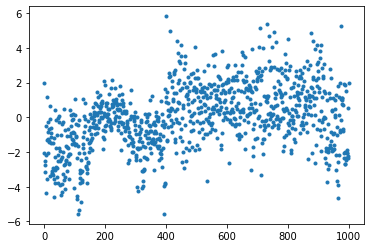

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

array([ 1.95664799e+00, -2.03085470e+00, -2.51743412e+00, -3.13369226e+00,
       -2.77770424e+00, -4.35986090e+00, -2.16523147e+00, -5.03382921e-01,
       -1.33506572e+00,  1.15689337e+00, -3.54962683e+00, -2.57667780e-01,
       -1.22450721e+00, -2.07392216e+00, -8.30268681e-01, -6.64518833e-01,
       -1.40977538e+00, -1.37738836e+00,  6.36318147e-01, -1.27294406e-01,
       -3.39697671e+00, -9.19562936e-01, -6.31381333e-01, -1.48303175e+00,
       -1.13319898e+00, -3.29469824e+00, -3.11865067e+00, -3.23908091e+00,
       -3.33257341e+00, -1.48364091e+00, -2.94617963e+00, -1.22079539e+00,
       -3.56764674e+00, -4.59454203e+00, -2.31452608e+00, -3.03564382e+00,
        4.13531423e-01, -3.80962849e+00, -2.86824465e+00, -1.75488138e+00,
       -1.66376159e-01, -2.93263292e+00, -3.46679878e+00, -1.01121593e+00,
       -2.50101185e+00, -3.80634785e+00, -2.04233229e-02, -2.17925525e+00,
       -2.62251377e-01, -1.74732482e+00,  9.98011827e-02, -1.92856169e+00,
       -2.54883337e+00, -

In [ ]:
np.argmax(X[0])

399

In [ ]:
labels[948]

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

abaya
pole
lakeside, lakeshore
pedestal, plinth, footstall
ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin
rain barrel
turnstile
pot, flowerpot
sliding door
vase


In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  9.,  35.,  77., 154., 252., 229., 158.,  57.,  22.,   7.]),
 array([-5.5695405 , -4.43046   , -3.291379  , -2.1522985 , -1.0132177 ,
         0.12586308,  1.2649438 ,  2.4040246 ,  3.5431051 ,  4.682186  ,
         5.8212667 ], dtype=float32),
 <a list of 10 Patch objects>)

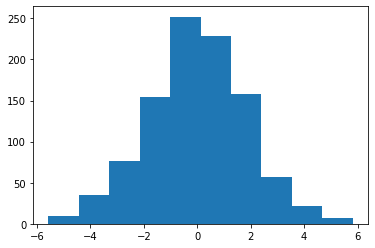

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▁▅▅▅▅█▅██▅▅██████▅██▅█▅███████▅█▅███▅▅▅▅
loss,█▄▅▄▄▁▄▁▁▄▄▁▁▁▁▁▁▄▁▁▄▁▄▁▁▁▁▁▁▁▄▁▄▁▁▁▄▄▄▄
acc_train,0.96875
loss,0.34451


<ipython-input-20-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

best run: acc_train 1.0

worst run: acc_train 0.21875

average run: acc_train 0.96875